# Pivot Table in Python
In this Jupyter Notebook, I have used Data Science Jobs Salaries Dataset containing Various Data Science related Jobs and Salaries. 
You can download this dataset from https://www.kaggle.com/saurabhshahane/data-science-jobs-salaries/download

## Dataset Description

<b>1. work_year</b>
    The year during which the salary was paid. There are two types of work year values: 
    
    2020: Year with a definitive amount from the past 

    2021e: Year with an estimated amount (e.g. current year)
    
    
<b>2. experience_level</b>
    The experience level in the job during the year with the following possible values: 
    
    EN: Entry-level / Junior
    
    MI: Mid-level / Intermediate
    
    SE: Senior-level / Expert
    
    EX: Executive-level / Director
    
<b>3. employment_type</b>
    The type of employement for the role:
    
    PT: Part-time
    
    FT: Full-time
    
    CT: Contract
    
    FL: Freelance

<b>4. job_title</b>

    The role worked in during the year.

<b>5. salary</b>

    The total gross salary amount paid.

<b>6. salary_currency</b>

    The currency of the salary paid as an ISO 4217 currency code.

<b>7. salary_in_usd</b>

    The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

<b>8. employee_residence</b>

    Employee's primary country of residence in during the work year as an ISO 3166 country code.
    
<b>9. remote_ratio</b>
    The overall amount of work done remotely, possible values are as follows:
    
    0: No remote work (less than 20%)
    
    50: Partially remote
    
    100: Fully remote (more than 80%)

<b>10. company_location</b>

    The country of the employer's main office or contracting branch as an ISO 3166 country code.
    
<b>11. company_size</b>
    The average number of people that worked for the company during the year:
    
    S: less than 50 employees (small)
    
    M: 50 to 250 employees (medium)
    
    L: more than 250 employees (large)

### Import required libraries

In [14]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(20, 20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [15]:
DSjob_df = pd.read_csv('Data Science Jobs Salaries.csv')
DSjob_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,Full Time,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,Full Time,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,Full Time,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,Full Time,Head of Data Science,230000,USD,230000,RU,50,RU,L
4,2021e,EN,Full Time,Machine Learning Engineer,125000,USD,125000,US,100,US,S


## How to group data using index in a pivot table?
<i>pivot_table</i> requires a data and an index parameter.

<i>data</i> is the Pandas dataframe you pass to the function.

<i>index</i> is the feature that allows you to group your data. The index feature will appear as an index in the resultant table.

Here, I have created a pivot-table by using index <i>'job_title'</i>

In [16]:
table = pd.pivot_table(DSjob_df,index=['job_title'])
table.head()

,remote_ratio,salary,salary_in_usd
job_title,,,
3D Computer Vision Researcher,50.0,400000.0,5423.0
AI Scientist,90.0,342800.0,28599.6
Applied Data Scientist,50.0,68000.0,54376.0
Applied Machine Learning Scientist,50.0,423000.0,423000.0
BI Data Analyst,70.0,2271454.4,78800.8


## How to create a pivot-table by using aggfunc?
<i>aggfunc</i> is an aggregate function that pivot_table applies to your grouped data. We can use count, np.mean, np.sum, etc.

In [17]:
table = pd.pivot_table(DSjob_df,index=['job_title','company_location'],values=['salary_in_usd'],aggfunc=np.mean)
table.head()

salary_in_usd
job_title                     company_location               
3D Computer Vision Researcher IN                       5423.0
AI Scientist                  AS                      18102.0
                              DK                      45896.0
                              ES                      55000.0
                              US                      12000.0

<b>Analysis:</b> From above pivot table, we can analyze location-wise how much salary is offered to a particular job_titile.

## How to create a Pivot table with multiple aggregation functions?

In [20]:
table = pd.pivot_table(data=DSjob_df, index=['employment_type'],
                        values='salary_in_usd',
                        aggfunc=['sum', 'mean', 'count'])
table

,sum,mean,count
,salary_in_usd,salary_in_usd,salary_in_usd
employment_type,,,
Contract,891000,222750.000000,4
Freelance,92000,30666.666667,3
Full Time,23318426,100945.567100,231
Part Time,166237,23748.142857,7


<b>Analysis:</b> In above pivot table, multiple aggregate functions are used for analysis. We can analyze salary offered as per employment type.

## How to calculate row and column grand totals in pivot_table?
The margins parameter is used to add all the rows and columns in the pivoting table. You can also call it as grand totaling.

In [12]:
# Calculate row and column totals (margins)
table = pd.pivot_table(data=DSjob_df, index=['employment_type'],
                        values='salary_in_usd',
                        aggfunc=['count'],
                        margins=True,
                        margins_name='Grand Total')
table

,count
,salary_in_usd
employment_type,
Contract,4
Freelance,3
Full Time,231
Part Time,7
Grand Total,245


## How to aggregate for multiple features in pivot table?

In [7]:
table = pd.pivot_table(DSjob_df,index=['job_title','company_location'],aggfunc={'job_title':'count','salary_in_usd':np.mean})
table.head()

job_title  salary_in_usd
job_title                     company_location                          
3D Computer Vision Researcher IN                        1         5423.0
AI Scientist                  AS                        1        18102.0
                              DK                        1        45896.0
                              ES                        1        55000.0
                              US                        2        12000.0

## Replacing missing values

In [8]:
# Replacing missing values
table = pd.pivot_table(data=DSjob_df, index='employment_type', values=['salary_in_usd'],
                        columns=['job_title'],
                        aggfunc={'salary_in_usd': np.sum},
                        fill_value='Not applicable')

table.head()

salary_in_usd                  \
job_title       3D Computer Vision Researcher    AI Scientist   
employment_type                                                 
Contract                       Not applicable  Not applicable   
Freelance                      Not applicable  Not applicable   
Full Time                      Not applicable        118998.0   
Part Time                              5423.0         24000.0   

                                                                           \
job_title       Applied Data Scientist Applied Machine Learning Scientist   
employment_type                                                             
Contract                Not applicable                     Not applicable   
Freelance               Not applicable                     Not applicable   
Full Time                      54376.0                           423000.0   
Part Time               Not applicable                     Not applicable   

                                                                      \
job_title       BI Data Analyst Big Data Architect Big Data Engineer   
employment_type                                                        
Contract         Not applicable     Not applicable    Not applicable   
Freelance        Not applicable     Not applicable    Not applicable   
Full Time              394004.0            99956.0          285911.0   
Part Time        Not applicable     Not applicable    Not applicable   

                                                           \
job_title       Business Data Analyst Cloud Data Engineer   
employment_type                                             
Contract                     100000.0      Not applicable   
Freelance              Not applicable      Not applicable   
Full Time                    194601.0            249514.0   
Part Time              Not applicable      Not applicable   

                                          ...  \
job_title       Computer Vision Engineer  ...   
employment_type                           ...   
Contract                  Not applicable  ...   
Freelance                        60000.0  ...   
Full Time                        19052.0  ...   
Part Time                        28850.0  ...   

                                                          \
job_title       Machine Learning Infrastructure Engineer   
employment_type                                            
Contract                                  Not applicable   
Freelance                                 Not applicable   
Full Time                                       245180.0   
Part Time                                 Not applicable   

                                                                 \
job_title       Machine Learning Scientist Manager Data Science   
employment_type                                                   
Contract                    Not applicable       Not applicable   
Freelance                          12000.0       Not applicable   
Full Time                         710000.0             144000.0   
Part Time                   Not applicable       Not applicable   

                                                               \
job_title       Marketing Data Analyst Principal Data Analyst   
employment_type                                                 
Contract                Not applicable         Not applicable   
Freelance               Not applicable         Not applicable   
Full Time                      89402.0               170000.0   
Part Time               Not applicable         Not applicable   

                                                                  \
job_title       Principal Data Engineer Principal Data Scientist   
employment_type                                                    
Contract                 Not applicable                 416000.0   
Freelance                Not applicable           Not applicable   
Full Time                      785000.0                 709489.0   
Part

The fill_value parameter can be used to replace NaNs with any suitable value including the mean, median or mode of other features.
## Multi-level index pivot tables

In [13]:
table = pd.pivot_table(DSjob_df,index=['job_title','employment_type','company_location'])
table.head()

remote_ratio  \
job_title                     employment_type company_location                 
3D Computer Vision Researcher Part Time       IN                        50.0   
AI Scientist                  Full Time       AS                       100.0   
                                              DK                        50.0   
                                              ES                       100.0   
                              Part Time       US                       100.0   

                                                                   salary  \
job_title                     employment_type company_location              
3D Computer Vision Researcher Part Time       IN                 400000.0   
AI Scientist                  Full Time       AS                1335000.0   
                                              DK                 300000.0   
                                              ES                  55000.0   
                              Part Time       US                  12000.0   

                                                                salary_in_usd  
job_title                     employment_type company_location                 
3D Computer Vision Researcher Part Time       IN                       5423.0  
AI Scientist                  Full Time       AS                      18102.0  
                                              DK                      45896.0  
                                              ES                      55000.0  
                              Part Time       US                      12000.0

## Additional pivot table options
DataFrame.pivot_table(data, values=None, index=None, columns=None,

                      aggfunc='mean', fill_value=None, margins=False,
                      
                      dropna=True, margins_name='All')

### Multilevel Pivoting of data
You know what, with the pivot_table function, you can add multiple options or levels in your quick analysis. Suppose you are interested in adding the attribute ‘age’ as another level, yes, you are free to do so.

In [11]:
#Multi-level pivoting 
attribute_remote_ratio = pd.cut(DSjob_df['remote_ratio'],[0,50,100])
 
table = DSjob_df.pivot_table(DSjob_df, ['job_title',attribute_remote_ratio],aggfunc={'job_title':'count'})
table.head()

job_title
job_title                     remote_ratio           
3D Computer Vision Researcher (0, 50]               1
                              (50, 100]             0
AI Scientist                  (0, 50]               1
                              (50, 100]             4
Applied Data Scientist        (0, 50]               1

Here, I have used pd.cut function to bin the ‘age’ data. I have added multiple levels. You can see 1-18 as minors and 18-60 are majors.

## Reshaping of pivot table by stacking and unstacking
- <b>stack:</b> "pivot" a level of the (possibly hierarchical) column labels, returning a DataFrame with an index with a new inner-most level of row labels.

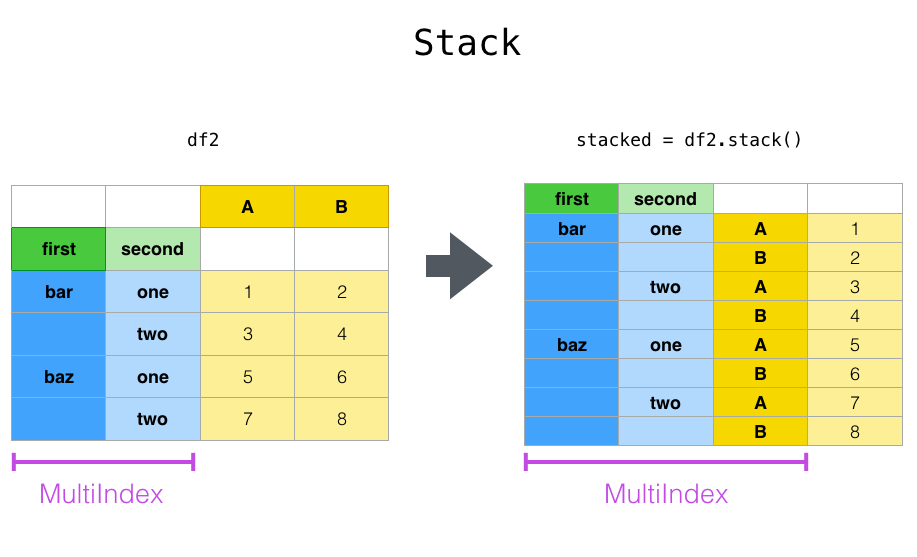

In [35]:
from IPython.display import Image
Image(filename='C:/Users\Shubhangi/Desktop/graph1.png')

- <b>unstack:</b> (inverse operation of stack) "pivot" a level of the (possibly hierarchical) row index to the column axis, producing a reshaped DataFrame with a new inner-most level of column labels.

In [37]:
table = pd.pivot_table(data=DSjob_df, index=['employment_type'],
                        values='salary_in_usd',
                        aggfunc=['sum', 'mean', 'count'])
table

,sum,mean,count
,salary_in_usd,salary_in_usd,salary_in_usd
employment_type,,,
Contract,891000,222750.000000,4
Freelance,92000,30666.666667,3
Full Time,23318426,100945.567100,231
Part Time,166237,23748.142857,7


In [38]:
table.stack()

,,sum,mean,count
employment_type,,,,
Contract,salary_in_usd,891000,222750.000000,4
Freelance,salary_in_usd,92000,30666.666667,3
Full Time,salary_in_usd,23318426,100945.567100,231
Part Time,salary_in_usd,166237,23748.142857,7


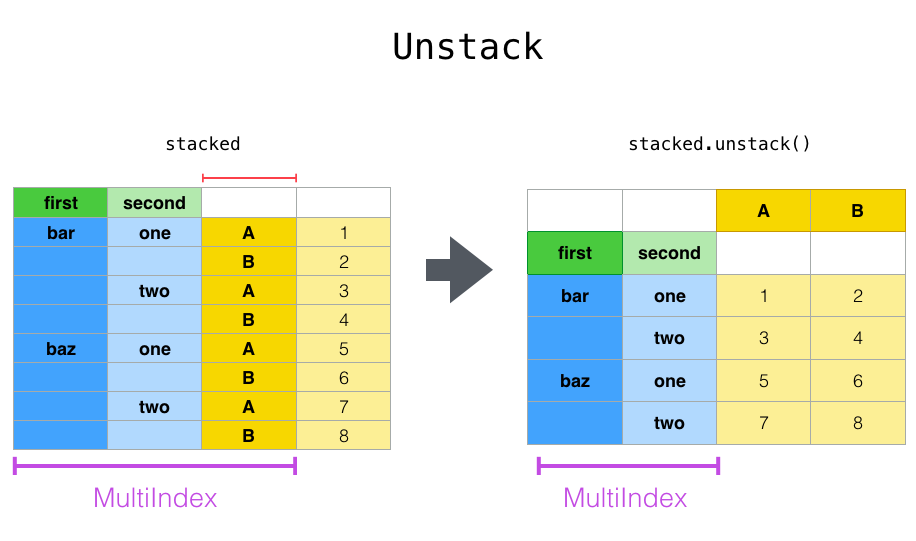

In [36]:
from IPython.display import Image
Image(filename='C:/Users\Shubhangi/Desktop/graph2.png')

In [39]:
table = pd.pivot_table(data=DSjob_df, index=['employment_type'],
                        values='salary_in_usd',
                        aggfunc=['sum', 'mean', 'count'])
table

,sum,mean,count
,salary_in_usd,salary_in_usd,salary_in_usd
employment_type,,,
Contract,891000,222750.000000,4
Freelance,92000,30666.666667,3
Full Time,23318426,100945.567100,231
Part Time,166237,23748.142857,7


In [40]:
table.unstack()

                      employment_type
sum    salary_in_usd  Contract           8.910000e+05
                      Freelance          9.200000e+04
                      Full Time          2.331843e+07
                      Part Time          1.662370e+05
mean   salary_in_usd  Contract           2.227500e+05
                      Freelance          3.066667e+04
                      Full Time          1.009456e+05
                      Part Time          2.374814e+04
count  salary_in_usd  Contract           4.000000e+00
                      Freelance          3.000000e+00
                      Full Time          2.310000e+02
                      Part Time          7.000000e+00
dtype: float64